In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./pitcher_income.csv')
df

,순위,선수명,팀명,ERA,IP,BB,SO,WHIP,salary
0,5,곽빈,두산,2.90,127.0,58,106,1.21,21000.0
1,6,홍건희,두산,3.06,61.0,24,62,1.48,30000.0
2,7,박치국,두산,3.59,52.0,21,48,1.42,13000.0
3,8,김명신,두산,3.65,79.0,27,65,1.25,22500.0
4,9,정철원,두산,3.96,72.0,32,55,1.35,16500.0
...,...,...,...,...,...,...,...,...,...
151,18,임준섭,SSG,5.79,32.0,19,26,1.93,4000.0
152,19,신헌민,SSG,6.00,12.0,6,8,2.08,3200.0
153,20,박종훈,SSG,6.19,80.0,60,56,1.71,110000.0
154,22,이기순,SSG,9.00,3.0,4,3,2.33,3100.0


In [3]:
df_all = pd.read_csv('./pitcher_income_all.csv')
df_all

,순위,선수명,팀명,ERA_x,G,W,L,SV,HLD,WPCT,...,NP,AVG,2B,3B,SAC,SF,IBB,WP,BK,salary
0,5,곽빈,두산,2.90,23,12,7,0,0,0.632,...,2229,0.212,18,1,7,4,0,4,1,21000.0
1,6,홍건희,두산,3.06,64,1,5,22,5,0.167,...,1092,0.272,10,3,6,1,3,8,0,30000.0
2,7,박치국,두산,3.59,62,5,3,2,11,0.625,...,923,0.258,9,2,1,0,1,2,0,13000.0
3,8,김명신,두산,3.65,70,3,3,1,24,0.500,...,1445,0.245,18,0,4,3,3,3,0,22500.0
4,9,정철원,두산,3.96,67,7,6,13,11,0.538,...,1254,0.242,6,0,5,3,2,6,1,16500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,15,문승원,SSG,5.23,50,5,8,1,9,0.385,...,1793,0.319,27,1,4,2,1,3,0,80000.0
131,16,이로운,SSG,5.62,50,6,1,0,5,0.857,...,1107,0.289,13,1,3,3,2,3,0,7400.0
132,17,송영진,SSG,5.70,17,3,3,0,0,0.500,...,871,0.257,9,1,4,4,0,8,2,4500.0
133,18,임준섭,SSG,5.79,41,0,2,0,4,0.000,...,666,0.336,6,0,3,1,1,2,0,4000.0


In [5]:
df_corr = df[['ERA', 'IP', 'BB', 'SO', 'WHIP', 'salary']].corr()

<Axes: >

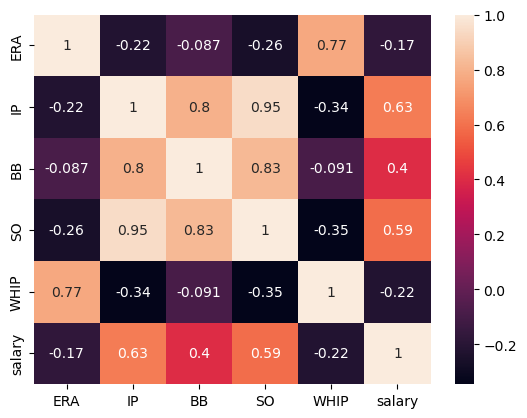

In [7]:
sns.heatmap(df_corr, annot = True)

In [8]:
df_c = df.copy()

In [9]:
df_c['SO/IP'] = df['SO'] / df['IP']

In [10]:
df_c

,순위,선수명,팀명,ERA,IP,BB,SO,WHIP,salary,SO/IP
0,5,곽빈,두산,2.90,127.0,58,106,1.21,21000.0,0.834646
1,6,홍건희,두산,3.06,61.0,24,62,1.48,30000.0,1.016393
2,7,박치국,두산,3.59,52.0,21,48,1.42,13000.0,0.923077
3,8,김명신,두산,3.65,79.0,27,65,1.25,22500.0,0.822785
4,9,정철원,두산,3.96,72.0,32,55,1.35,16500.0,0.763889
...,...,...,...,...,...,...,...,...,...,...
151,18,임준섭,SSG,5.79,32.0,19,26,1.93,4000.0,0.812500
152,19,신헌민,SSG,6.00,12.0,6,8,2.08,3200.0,0.666667
153,20,박종훈,SSG,6.19,80.0,60,56,1.71,110000.0,0.700000
154,22,이기순,SSG,9.00,3.0,4,3,2.33,3100.0,1.000000


In [12]:
df_c_corr = df_c[['ERA', 'IP', 'BB', 'SO', 'WHIP', 'salary', 'SO/IP']].corr()

<Axes: >

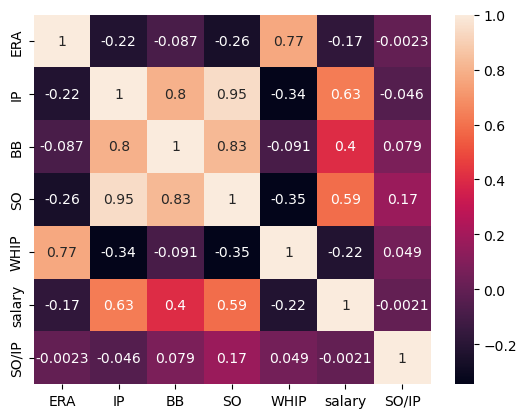

In [13]:
sns.heatmap(df_c_corr, annot = True)

In [14]:
df_G = df_all[['선수명', 'G']]

In [15]:
df_cg = pd.merge(df_c, df_G, on = '선수명', how = 'left')
df_cg

,순위,선수명,팀명,ERA,IP,BB,SO,WHIP,salary,SO/IP,G
0,5,곽빈,두산,2.90,127.0,58,106,1.21,21000.0,0.834646,23.0
1,6,홍건희,두산,3.06,61.0,24,62,1.48,30000.0,1.016393,64.0
2,7,박치국,두산,3.59,52.0,21,48,1.42,13000.0,0.923077,62.0
3,8,김명신,두산,3.65,79.0,27,65,1.25,22500.0,0.822785,70.0
4,9,정철원,두산,3.96,72.0,32,55,1.35,16500.0,0.763889,67.0
...,...,...,...,...,...,...,...,...,...,...,...
179,18,임준섭,SSG,5.79,32.0,19,26,1.93,4000.0,0.812500,41.0
180,19,신헌민,SSG,6.00,12.0,6,8,2.08,3200.0,0.666667,NaN
181,20,박종훈,SSG,6.19,80.0,60,56,1.71,110000.0,0.700000,18.0
182,22,이기순,SSG,9.00,3.0,4,3,2.33,3100.0,1.000000,NaN


In [16]:
df_cg.isna().sum()

순위         0
선수명        0
팀명         0
ERA        0
IP         0
BB         0
SO         0
WHIP       0
salary     0
SO/IP      0
G         25
dtype: int64

In [17]:
df_cg_drop = df_cg.dropna()

In [18]:
df_cg_drop

,순위,선수명,팀명,ERA,IP,BB,SO,WHIP,salary,SO/IP,G
0,5,곽빈,두산,2.90,127.0,58,106,1.21,21000.0,0.834646,23.0
1,6,홍건희,두산,3.06,61.0,24,62,1.48,30000.0,1.016393,64.0
2,7,박치국,두산,3.59,52.0,21,48,1.42,13000.0,0.923077,62.0
3,8,김명신,두산,3.65,79.0,27,65,1.25,22500.0,0.822785,70.0
4,9,정철원,두산,3.96,72.0,32,55,1.35,16500.0,0.763889,67.0
...,...,...,...,...,...,...,...,...,...,...,...
176,15,문승원,SSG,5.23,105.0,35,65,1.65,80000.0,0.619048,50.0
177,16,이로운,SSG,5.62,57.0,29,52,1.66,7400.0,0.912281,50.0
178,17,송영진,SSG,5.70,47.0,31,38,1.63,4500.0,0.808511,17.0
179,18,임준섭,SSG,5.79,32.0,19,26,1.93,4000.0,0.812500,41.0


In [20]:
df_co = df_cg_drop[['ERA', 'IP', 'BB', 'SO', 'WHIP', 'salary', 'SO/IP', 'G']].corr()

<Axes: >

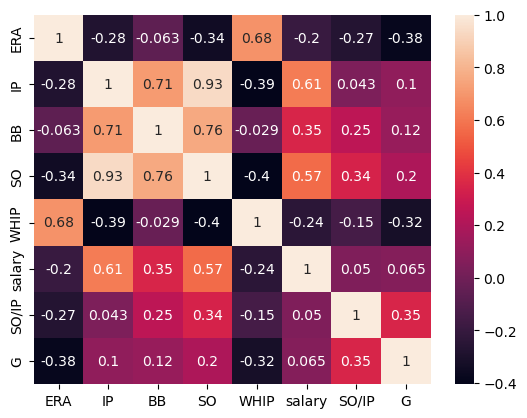

In [21]:
sns.heatmap(df_co, annot = True)

In [22]:
df_cg_drop_c = df_cg_drop.copy()

In [23]:
df_cg_drop_c['IP/G'] = df_cg_drop_c['IP'] / df_cg_drop_c['G']

In [24]:
df_co_c = df_cg_drop_c[['ERA', 'IP', 'BB', 'SO', 'WHIP', 'salary', 'SO/IP', 'G', 'IP/G']].corr()

<Axes: >

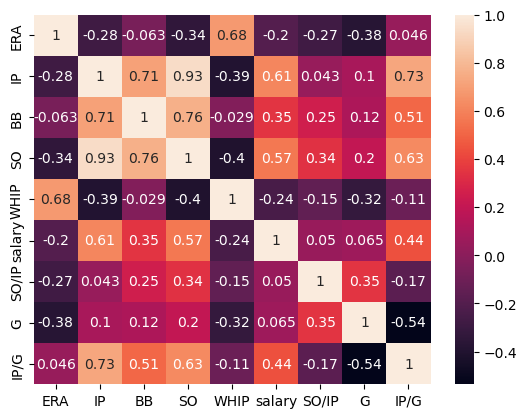

In [25]:
sns.heatmap(df_co_c, annot = True)

In [26]:
df_cg_drop_c

,순위,선수명,팀명,ERA,IP,BB,SO,WHIP,salary,SO/IP,G,IP/G
0,5,곽빈,두산,2.90,127.0,58,106,1.21,21000.0,0.834646,23.0,5.521739
1,6,홍건희,두산,3.06,61.0,24,62,1.48,30000.0,1.016393,64.0,0.953125
2,7,박치국,두산,3.59,52.0,21,48,1.42,13000.0,0.923077,62.0,0.838710
3,8,김명신,두산,3.65,79.0,27,65,1.25,22500.0,0.822785,70.0,1.128571
4,9,정철원,두산,3.96,72.0,32,55,1.35,16500.0,0.763889,67.0,1.074627
...,...,...,...,...,...,...,...,...,...,...,...,...
176,15,문승원,SSG,5.23,105.0,35,65,1.65,80000.0,0.619048,50.0,2.100000
177,16,이로운,SSG,5.62,57.0,29,52,1.66,7400.0,0.912281,50.0,1.140000
178,17,송영진,SSG,5.70,47.0,31,38,1.63,4500.0,0.808511,17.0,2.764706
179,18,임준섭,SSG,5.79,32.0,19,26,1.93,4000.0,0.812500,41.0,0.780488
